In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format','{0:.2f}'.format)
%matplotlib inline

In [2]:
### Read in data ()csv format
data = pd.read_csv("abalone.csv", delimiter=',', encoding='utf-8')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7


In [3]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00
mean,0.52,0.41,0.14,0.83,0.36,0.18,0.24,9.93
std,0.12,0.10,0.04,0.49,0.22,0.11,0.14,3.22
min,0.07,0.06,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.45,0.35,0.12,0.44,0.19,0.09,0.13,8.00
50%,0.55,0.42,0.14,0.80,0.34,0.17,0.23,9.00
75%,0.61,0.48,0.17,1.15,0.50,0.25,0.33,11.00
max,0.81,0.65,1.13,2.83,1.49,0.76,1.00,29.00


In [4]:
label = data['Sex']
data = data[data.columns[1:]]

In [5]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7


In [6]:
mapping = {'I':0.1, 'F':0.5, 'M':0.9}
label = label.apply(lambda x: mapping[x])

In [7]:
data.isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

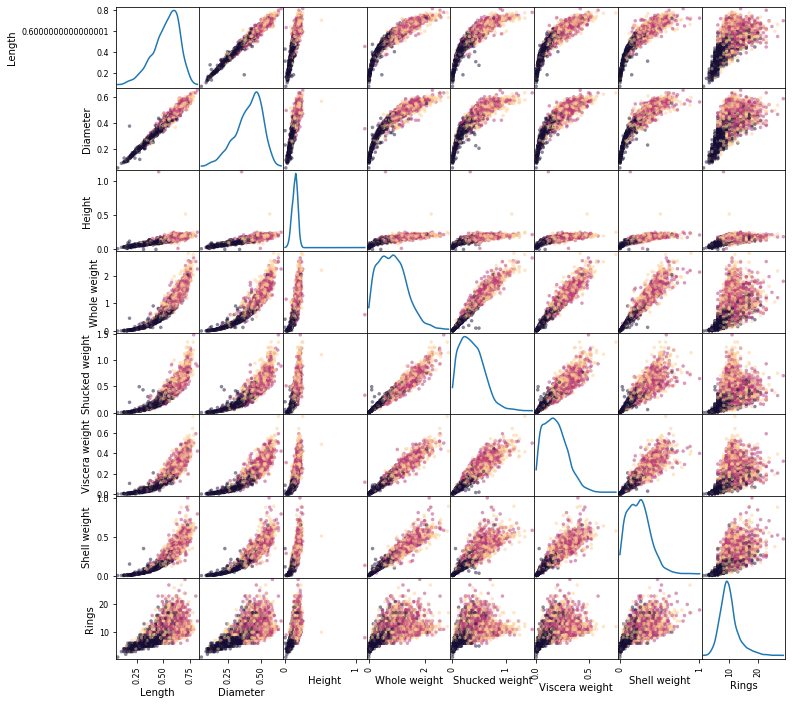

In [8]:
sm = pd.plotting.scatter_matrix(data, alpha=0.5, s=50, figsize=(12,12), c=plt.cm.magma(label), diagonal='kde');
# set the fontsizes
[s.xaxis.label.set_fontsize(10) for s in sm[-1]]
[s.yaxis.label.set_fontsize(10) for s in sm.T[0]]
plt.show()

# Idea behind PCA

Consider $X$ to be a set of $n$ $D$-dimensional random variables $x_1,\ldots,x_n \in \mathbb{R}^D$.
Further, let $u$ be a $D$-dimensional vector of unit length.
It is important that the length of $u$ is constant, as the optimization problem otherwise becomes unbounded.
To find the first principal direction of the data, we are looking for a vector  $u^*$ that maximizes the variance of $x_1,\ldots,x_n$, projected onto it:

$$
    \begin{equation}
    u^* = \underset{u:\ ||u|| = 1}{\text{argmax}}\ var(uX^\top)\nonumber\\
    \end{equation}
$$

# Solution

With the variance of a random variable $W$ defined as

$$
    \begin{equation}
        var(W)  =  \mathbb{E}[(W - \mathbb{E}(W))^2]\nonumber \\
    \end{equation}
$$

and considering the mean as the empirical estimate of the expected value, we retrieve the following equation:

$$
    \begin{equation}
        u^* = \underset{u:\ ||u|| = 1}{\text{argmax}}\ \mathbb{E}[(\ uX^\top - \mathbb{E}(uX^\top))^2]\nonumber \\
    \end{equation}
$$

To simplify the calculation we can assume without loss of generality that $X$ is centered around its mean, which leads us to:

$$
\begin{eqnarray}
    u^* & = & \underset{u:\ ||u|| = 1}{\text{argmax}}\ \mathbb{E}[(\ uX^\top - \underbrace{\mathbb{E}(uX^\top)}_{=0}\ )^2] \nonumber \\
    ~ & = & \underset{u:\ ||u|| = 1}{\text{argmax}}\ \mathbb{E}[(uX^\top)^2] \nonumber \\
    ~ & = & \underset{u:\ ||u|| = 1}{\text{argmax}}\ \frac{1}{n}\cdot uX^\top Xu^\top \nonumber\\
\end{eqnarray}
$$

Note that for a collection $C$ of centered $D$-dimensional data records $\frac{1}{n}\cdot X^\top X$ can be considered the covariance matrix  $\Sigma$ of $C$, as

$$
\begin{equation}
    \Sigma = \mathbb{E}[(C-\underbrace{\mathbb{E}(C)}_{=0})^\top\cdot(C-\underbrace{\mathbb{E}(C)}_{=0})] = \mathbb{E}[C^\top C] = \frac{1}{n}\cdot C^\top C.\nonumber \\
\end{equation}
$$

Because the eigenvector of a matrix that corresponds to the largest eigenvalue, signifies the largest stretch of the linear transformation performed by the matrix, we can follow that the particular $u^*$ which maximizes $u^\top \Sigma u$ has to be the eigenvector of $\Sigma$ with the largest eigenvalue.
Projecting $X$ into a space that is orthogonal to this first principal direction and repeating the process yields the second principal direction, which exhibits the largest variance of $X$ orthogonal to the first principal direction.

# Application (Scatterplot visualization)

In [9]:
from sklearn.preprocessing import minmax_scale
normalized_data = minmax_scale(data)
normalized_data.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
# Calculate PCA embedding
pca = PCA()
projection = pd.DataFrame(pca.fit_transform(normalized_data), columns=['PC-%d'%(i+1) for i in range(data.shape[1])])
projection.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-0.19,0.21,0.01,-0.07,0.03,-0.02,-0.02,0.00
1,-0.51,-0.02,0.04,0.00,0.00,0.00,-0.00,0.00
2,-0.07,0.00,-0.08,0.03,-0.01,0.00,-0.01,-0.01
3,-0.23,0.05,-0.00,-0.01,-0.00,0.01,-0.03,0.00
4,-0.54,-0.02,0.05,-0.00,0.01,-0.00,-0.01,-0.00


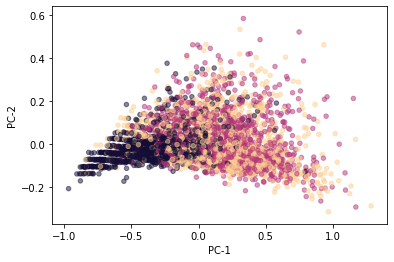

In [11]:
projection.plot.scatter(x='PC-1', y='PC-2', alpha=0.5, c=plt.cm.magma(label));

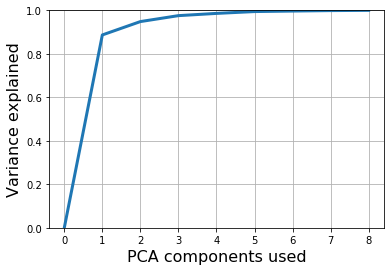

In [12]:
plt.plot([0] + pca.explained_variance_ratio_.cumsum().tolist(), linewidth=3)
plt.ylim([0,1])
plt.xlabel('PCA components used', fontsize=16)
plt.ylabel('Variance explained', fontsize=16)
plt.grid()

**This means that for this (normalized) dataset, ~90% of the variance are explained by using the most significant component**

This is also reflected in the eigenvalues of the spectral decomposition of the normalized datas covariance matrix

In [13]:
pca.singular_values_

array([24.44271907,  6.43430407,  4.29109332,  2.63248932,  2.3849469 ,
        1.26115526,  1.19038799,  0.84793556])